# Einleitung

Im Folgenden demonstrieren wir wie man ein einfaches Vorhersagemodell trainieren kann, um Brusttumore in gutartige und bösartige Tumore zu klassifizieren, gegeben einiger numerischer Eigenschaften über den jeweiligen Tumor.

Wir werden dafür den [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) Datensatz nutzen. Wir haben den Datensatz leicht vereinfacht, indem wir zwei Spalten aus der CSV-Datei entfernt haben. Den vereinfachten Datensatz finden Sie in der Datei `data_simplified.csv`.

Wir werden fast ausschliesslich Module verwenden, die Sie bereits in der Vorlesung kennen gelernt haben. Die einzige Ausnahme ist das `sklearn` Modul, das nützlich ist, um Vorhersagemodelle zu definieren und zu trainieren. Wir werden dabei zwei verschiedene Modelle nutzen: eine logistische Regression, die Ihnen bereits aus früheren Vorlesungen bekannt sein sollte, sowie ein Random Forest––ein beliebtes Machine Learning Modell, das kompliziertere Abhängigkeiten abbilden kann als die Logistische Regression. Betrachten Sie den Random Forest zunächst als ein "Black-Box" Modell, mit einer theoretisch besseren Vorhersagekraft als die logistische Regression. Weiteres über den Random Forest und viele andere Machine Learning Methoden werden Sie in der Vorlesung *Data Science for Medicine* erfahren.

# Laden der benötigten Module

Zunächst laden wir die Module, die wir für die Datenanalyse benötigen werden. Das funktioniert im Jupyter Notebook genau so, wie Sie es in CodeExpert kennen gelernt haben.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Laden der Daten

Wir lesen zunächst die Daten (CSV-Datei) als Pandas DataFrame ein:

In [2]:
# Daten einlesen als Pandas DataFrame
data = pd.read_csv("data_simplified.csv")

Das Jupyter Notebook erlaubt uns bereits einen Blick in die Daten zu werfen:

In [3]:
data.head(10)  # zeigt uns die ersten 10 Zeilen

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Zudem können wir uns ausgeben lassen, wie viele Reihen und Spalten unsere Daten haben:

In [4]:
print(data.shape)

(569, 31)


Aus den oben genannten Informationen können bereits folgende Eigenschaften über die Daten ableiten:
- Jede Zeile enthält numerische Informationen über die Eigenschaften eines Tumors, wie zum Beispiel dessen Radius, Textur, etc.
- Die Spalte `diagnosis` sagt uns ob der Tumor gutartig (B, für benign) oder bösartig (M, für malignant) ist.
- Der Datensatz besteht aus 569 Reihen (Anzahl Tumor-Messungen) und 31 Spalten (Anzahl numerischer Eigenschaften für jeden Tumor)

Im Folgenden werden wir eine kurze explorative Analyse der Daten durchführen, bevor wir uns schliesslich der Vorhersage widmen, ob es sich, gegeben der numerischen Eigenschaften, um einen gutartigen oder bösartigen Tumor handelt.

# Explorative Analyse

## Histogram

Ein Histogram lässt uns darstellen wie häufig ein jeweiliger Wert im Datensatz vorkommt. Damit können wir die Verteilung von numerischen und kategorischen Variablen visualisieren und entsprechend unterschiedlich einfärben für unterschiedliche Klassen. Für die Visualisierung eines Histograms nutzen wir die `hist` Funktion des uns bereits bekannten Moduls `matplotlib`.

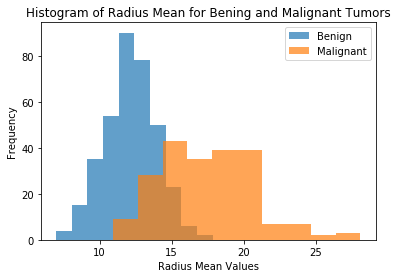

In [5]:
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean, alpha=0.7, label="Benign")
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean, alpha=0.7, label="Malignant")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

Das Histogram zeigt uns die Verteilung der Variable `radius_mean`, dem Radius eines Tumors, jeweils für gutartige und bösartige Tumore. Visuell können wir bereits erkennen, dass im gegebenen Datensatz bösartige Tumore im Durchschnitt einen grösseren Radius haben als gutartige Tumore.

## Korrelation

Der Korrelationskoeffizienz hilft uns die stärke der linearen Abhängigkeit zwischen zwei Variablen zu messen. Insbesondere interessiert uns die Korrelation zwischen einer bösartigen Tumordiagnose und jeder numerischen Variable. Entsprechen können wir durch alle Spalten iterieren, indem wir auf das Attribut `columns` des DataFrames zugreifen und die Funktion `corr` nutzen, um den Korrelationskoeffizient zwischen zwei Variablen zu berechnen.

In [6]:
for c in data.columns:
    if c != "diagnosis":
        print(c)
        print(data[c].corr(data["diagnosis"] == "M"))
        print()

radius_mean
0.7300285113754558

texture_mean
0.4151852998452037

perimeter_mean
0.742635529725832

area_mean
0.7089838365853891

smoothness_mean
0.3585599650859317

compactness_mean
0.5965336775082525

concavity_mean
0.6963597071719048

concave points_mean
0.7766138400204347

symmetry_mean
0.33049855426254654

fractal_dimension_mean
-0.012837602698432348

radius_se
0.5671338208247165

texture_se
-0.008303332973877411

perimeter_se
0.5561407034314825

area_se
0.5482359402780237

smoothness_se
-0.06701601057948724

compactness_se
0.2929992442488581

concavity_se
0.25372976598083014

concave points_se
0.40804233271650414

symmetry_se
-0.006521755870647972

fractal_dimension_se
0.07797241739025602

radius_worst
0.7764537785950386

texture_worst
0.45690282139679755

perimeter_worst
0.7829141371737584

area_worst
0.7338250349210504

smoothness_worst
0.421464861066402

compactness_worst
0.5909982378417914

concavity_worst
0.6596102103692325

concave points_worst
0.7935660171412688

symmetry_w

Die Ausgabe zeigt uns zum Beispiel, dass der Korrelationskoeffizient zwischen der Variable `radius_mean` und einer bösartigen Diagnose 0.73 beträgt––ein relativ starker positiver linearer Zusammenhang.

# Vorhersage

Nun widmen wir uns der Vorhersage der Tumordiagnose (gut- oder bösartig) gegeben der numerischen Eigenschaften. Dafür definieren wir zunächst einen DataFrame `X`, der nur die numerischen Eigenschaften enthält und eine abhängige Variable `y`, in der wir nur die Diagnose für alle Beobachtungen speichern.

In [7]:
X = data.drop("diagnosis", axis=1)   # unabhängige Variablen die wir für die Vorhersage nutzen wollen
y = data["diagnosis"]                # abhängige Variable, die wir Vorhersagen möchten

Um ein Modell auf dem uns vorliegenden Daten zu "trainieren" (ein typischer Begriff im Machine Learning), initialisieren wir zunächst das gewünschte Modell und benutzen dann die `fit` Funktion, um das Modell für die Vorhersage von `y` gegeben `X` zu trainieren:

In [8]:
model_logistic = LogisticRegression()
model_logistic.fit(X, y)

model_random_forest = RandomForestClassifier()
model_random_forest.fit(X, y)

/Users/imant/.venv/bili/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/imant/.venv/bili/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Nun können wir das trainierte Modell nutzen, um eine Vorhersage für neue Patienten zu machen. Zum Beispiel können wir das Modell nutzen, um die ersten 10 Tumore zu diagnostizieren:

In [9]:
prediction_logistic = model_logistic.predict(X.values[0:10])
print(prediction_logistic)

['M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M']


Entsprechend können wir die *durchschnittliche Vorhersagegenauigkeit* auf den vorliegenden Daten berechnen:

In [10]:
print(np.mean(model_logistic.predict(X) == y))
print(np.mean(model_random_forest.predict(X) == y))

0.9595782073813708
0.9982425307557118


**Interpretation:** gegeben der numerischen Eigenschaften eines Brusttumors (Grösse, Textur, etc.) erzielt die Logistische Regression eine durchschnittliche Vorhersagegenauigkeit von etwa 96% und ein Random Forest entsprechend fast 100% für die Diagnose von gutartigen vs. bösartigen Tumoren.

Aber nicht so schnell! Wir haben dabei nicht berücksichtigt, dass wir das Modell auf den *gleichen* Daten trainieren und evaluieren. Dadurch ist die Vorhersagegenauigkeit wahrscheinlich zu optimistisch. Deswegen sollten wir das Modell besser nur auf einem Teil der Daten trainieren und einem zweiten, separaten Teil der Daten evaluieren. 

Mehr zur Bereinigung und Visualisierung von Daten sowie zur Anwendung von Machine Learning Methoden erfahren Sie in der Vorlesung *Data Science for Medicine*.

 

*P.S.:* Falls Sie sich für solche Herausforderungen in der angewandten Datenanalyse interessieren, könnte die Plattform [Kaggle](https://www.kaggle.com) etwas für Sie sein. Mitunter finden Sie dort auch den hier vorgestellten Datensatz [Breast Cancer Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).